## Observations and Insights

Three take aways
- There is a strong positive correlation between the weight of a mouse and the average tumor volume, which suggests that weight contributes to risk of developing tumors. 
- Mice that recieved treatment from Capomulin showed significant decrease in tumor size over the 45 day period suggesting a high drug efficacy

-among the top four drugs Capomulin had the largest variance which suggests that its successes may not be as statistically significant as its counter parts


# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.


## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merged_df = pd.merge(mouse_metadata, study_results, on=('Mouse ID'), how ='outer')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
drug_summary =pd.DataFrame(merged_df.groupby("Drug Regimen").count())


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
drug_summary["Mean"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
drug_summary["Median"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
drug_summary["Variance"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
drug_summary["Std. Dev"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
drug_summary["SEM"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

drug_summary = drug_summary[["Mouse ID", "Mean", "Median", "Std. Dev", "Variance", "SEM"]]

drug_summary = drug_summary.rename(columns = {"Mouse ID" : "Trials"})

drug_summary.head()


,Trials,Mean,Median,Std. Dev,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

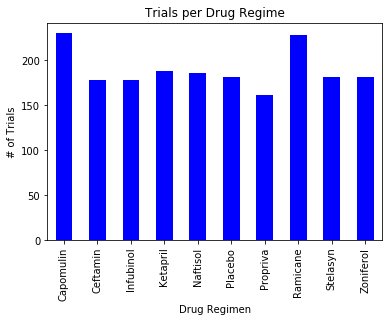

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

num_trials = drug_summary[["Trials"]]


num_trials.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

#titles
plt.title("Trials per Drug Regime")
plt.ylabel("# of Trials")
plt.show()
plt.tight_layout()

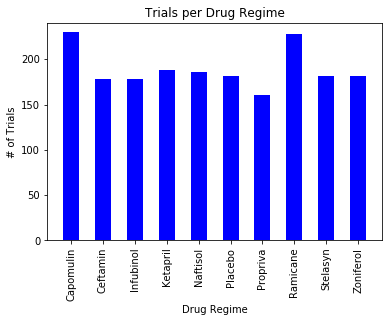

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


# Set x axis and tick locations
x_axis = np.arange(len(num_trials))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, num_trials["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, num_trials.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(num_trials["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")
plt.ylabel("# of Trials")


# Save our graph and show the grap
plt.show()

## Pie plots

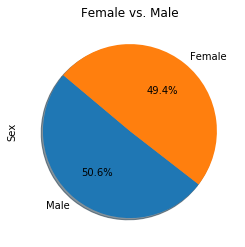

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data_1 = merged_df.Sex.value_counts()


# Use DataFrame.plot() in order to create a bar chart of the data
pie_data_1.plot.pie(y= 'Type',  labels=pie_data_1.index.values, 
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)

# Set a title for the chart
plt.title("Female vs. Male")

plt.show()

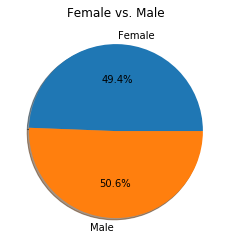

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]

sex = merged_df.groupby('Sex').count()
plt.pie(sex["Mouse ID"], labels=labels, 
         shadow=True, autopct='%1.1f%%')


plt.title("Female vs. Male")

plt.show()

## Quartiles, outliers and boxplots

In [11]:
### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

top_df = merged_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
best_df = top_df.loc[top_df["Timepoint"] == 45]
best_df.head().reset_index()

top_drugs = [ "Capomulin","Ramicane", "Infubinol","Ceftamin"]

#--------------------------------------------------------------------------------------------
cap_df = best_df[best_df['Drug Regimen'].isin(['Capomulin'])]
cap_df.head().reset_index()
cap_drug = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_drug = cap_drug["Tumor Volume (mm3)"]

#--------------------------------------------------------------------------------------------

ram_df = best_df[best_df['Drug Regimen'].isin(['Ramicane'])]
ram_df.head().reset_index()
ram_drug = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_drug = ram_drug["Tumor Volume (mm3)"]

#--------------------------------------------------------------------------------------------

inf_df = best_df[best_df['Drug Regimen'].isin(['Infubinol'])]
inf_df.head().reset_index()
inf_drug = inf_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_drug = inf_drug["Tumor Volume (mm3)"]


#--------------------------------------------------------------------------------------------

cef_df = best_df[best_df['Drug Regimen'].isin(['Ceftamin'])]
cef_df.head().reset_index()
cef_drug = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_drug = cef_drug["Tumor Volume (mm3)"]



#Calculate the IQR and quantitatively determine if there are any potential outliers.

#set quartiles
cap_quartiles = cap_drug.quantile([.25,.5,.75])
ram_quartiles = ram_drug.quantile([.25,.5,.75])
inf_quartiles = inf_drug.quantile([.25,.5,.75])
cef_quartiles = cef_drug.quantile([.25,.5,.75])

#lower quart
cap_lowerq = cap_quartiles[0.25]
ram_lowerq = ram_quartiles[0.25]
inf_lowerq = inf_quartiles[0.25]
cef_lowerq = cef_quartiles[0.25]

#upper quart
cap_upperq = cap_quartiles[0.75]
ram_upperq = ram_quartiles[0.75]
inf_upperq = inf_quartiles[0.75]
cef_upperq = cef_quartiles[0.75]

#mid quart
cap_midq = cap_quartiles[0.5]
ram_midq = ram_quartiles[0.5]
inf_midq = inf_quartiles[0.5]
cef_midq = cef_quartiles[0.5]


#irq
cap_iqr = cap_upperq-cap_lowerq
ram_iqr = ram_upperq-ram_lowerq
inf_iqr = inf_upperq-inf_lowerq
cef_iqr = cef_upperq-cef_lowerq

#lower bound
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)


#upperbound
cap_upper_bound = cap_upperq - (1.5*cap_iqr)
ram_upper_bound = ram_upperq - (1.5*ram_iqr)
inf_upper_bound = inf_upperq - (1.5*inf_iqr)
cef_upper_bound = cef_upperq - (1.5*cef_iqr)

#print output
print(f"The lower quartile of {top_drugs[0]} is: {cap_lowerq}")
print(f"The upper quartile of {top_drugs[0]} is: {cap_upperq}")
print(f"The interquartile range of {top_drugs[0]} is: {cap_iqr}")
print(f"The the median of {top_drugs[0]} is: {cap_midq} ")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
print(f"-------------------------------------------------------------")

print(f"The lower quartile of {top_drugs[1]} is: {ram_lowerq}")
print(f"The upper quartile of {top_drugs[1]} is: {ram_upperq}")
print(f"The interquartile range of {top_drugs[1]} is: {ram_iqr}")
print(f"The the median of {top_drugs[1]} is: {ram_midq} ")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print(f"-------------------------------------------------------------")

print(f"The lower quartile of {top_drugs[2]} is: {inf_lowerq}")
print(f"The upper quartile of {top_drugs[2]} is: {inf_upperq}")
print(f"The interquartile range of {top_drugs[2]} is: {inf_iqr}")
print(f"The the median of {top_drugs[0]} is: {inf_midq} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print(f"-------------------------------------------------------------")

print(f"The lower quartile of {top_drugs[3]} is: {cef_lowerq}")
print(f"The upper quartile of {top_drugs[3]} is: {cef_upperq}")
print(f"The interquartile range of {top_drugs[3]} is: {cef_iqr}")
print(f"The the median of {top_drugs[3]} is: {cef_midq} ")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
print(f"-------------------------------------------------------------")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 28.486425109999995 could be outliers.
-------------------------------------------------------------
The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 27.217610183749997 could be outliers.
-------------------------------------------------------------
The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Capomulin is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


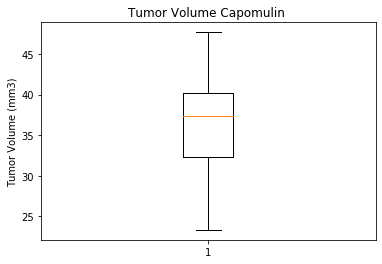

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_drug)
plt.show()

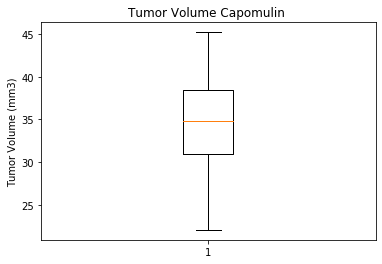

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_drug)
plt.show()

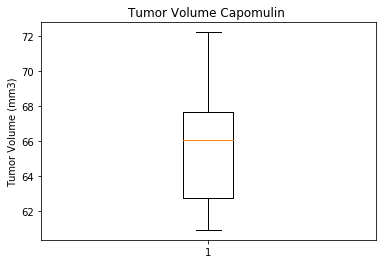

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(inf_drug)
plt.show()

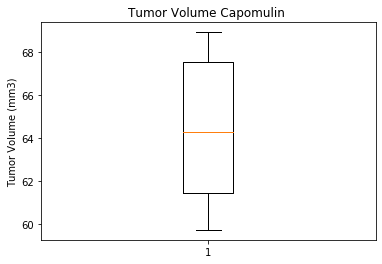

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cef_drug)
plt.show()

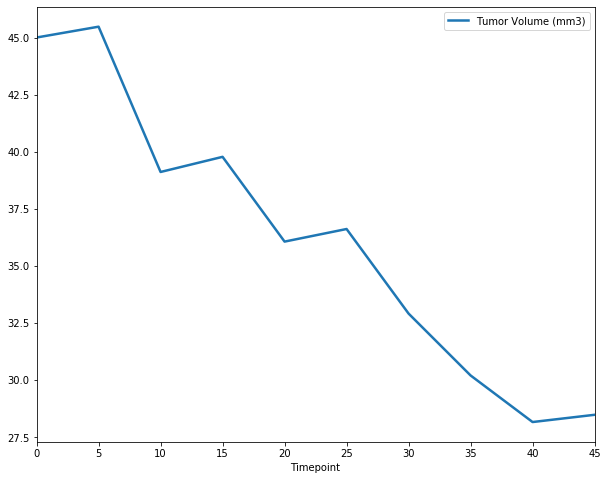

In [17]:
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401"]
mouse_df = mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
mouse_df = mouse_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5)

## Line and scatter plots

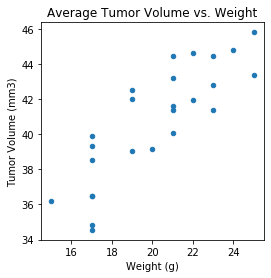

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
wght_vol = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_cap = pd.DataFrame(wght_vol.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.set_index('Mouse ID')
avg_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(4,4),
              title="Average Tumor Volume vs. Weight")
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

wght = avg_cap.iloc[:,0]
avg_vol = avg_cap.iloc[:,1]
correlation = st.pearsonr(wght,avg_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [20]:
x_bar = avg_cap['Weight (g)']
y_bar = avg_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_bar, y_bar)


plt.scatter(x_bar, y_bar)
plt.plot(x_bar,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

NameError: name 'linregress' is not defined